In [1]:
# import the necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Load Image

In [2]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

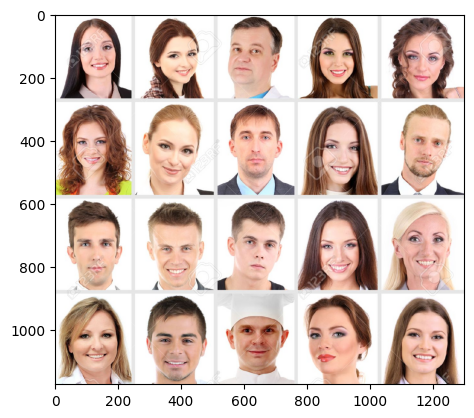

In [3]:
filename = "sample1.jpg"
img = read_file(filename)

org_img = np.copy(img)

## Create Edge Mask

In [4]:
def edge_mask(img, line_size, blur_value):
  #input: Input image
  #output: Edges of image
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)

  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

  return edges

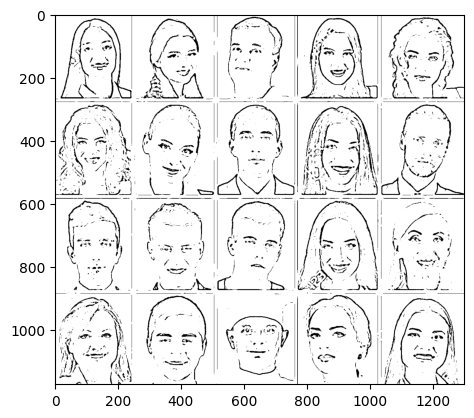

In [6]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap = "gray")
plt.show()

## Reduce the Color Pallete

In [7]:
def color_quantization(img, k):

  # Transform Image
  data = np.float32(img).reshape((-1,3))

  #Determine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #Implement K-Means

  ret, label, center = cv2.kmeans(data, k, None , criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

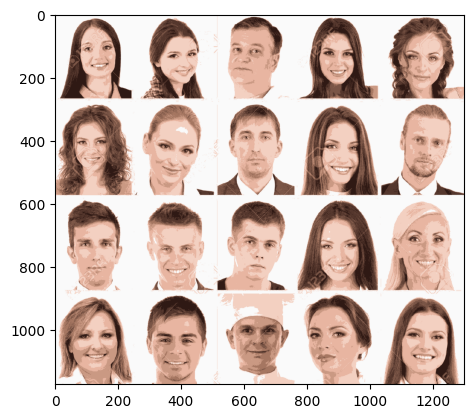

In [8]:
img = color_quantization(img, k=8)

plt.imshow(img)
plt.show()

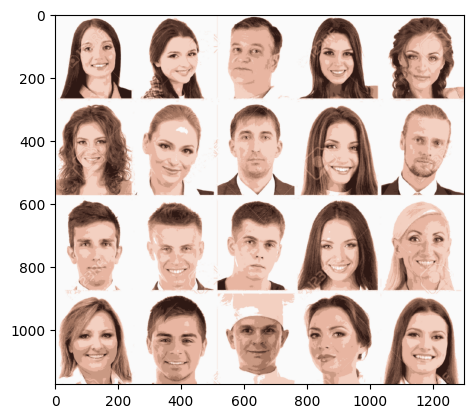

In [9]:
#reduce the noise

blurred = cv2.bilateralFilter(img, d = 3, sigmaColor= 200, sigmaSpace= 200)

plt.imshow(blurred)
plt.show()

##Combine Edge Mask with quantiz img

In [10]:
def cartoon( ):
  c = cv2.bitwise_and(blurred, blurred, mask= edges)

  plt.imshow(c)
  plt.title("Cartoon Image")
  plt.show()

  plt.imshow(org_img)
  plt.title("Original Image")
  plt.show()

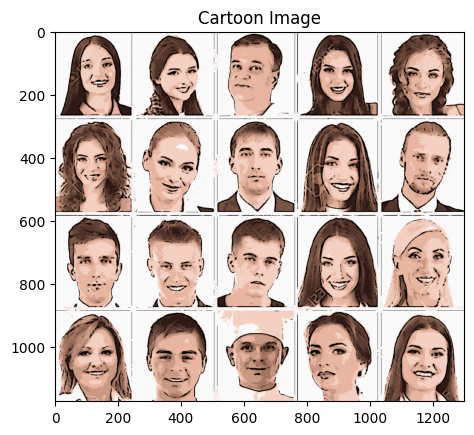

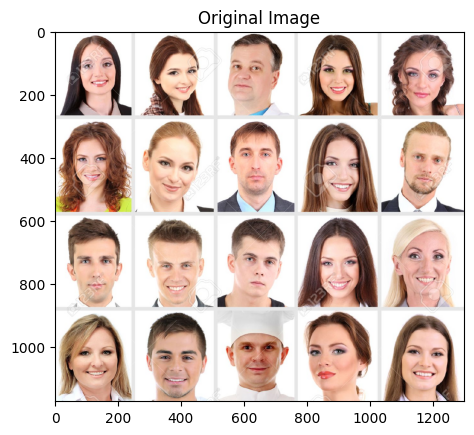

In [11]:
cartoon()